## Machine Learning with NLP, and Introduction
##### By Ruben Seoane, all credit to nlpforhackers.io
Based on: http://nlpforhackers.io/introduction-machine-learning/

### Classifying Boy vs Girl names
Dataset can be found here: http://nlpforhackers.io/wp-content/uploads/2017/01/names_dataset.csv


In [3]:
# Let's read the data
import pandas as pd
import numpy as np

names = pd.read_csv('names_dataset.csv')
print(names)

print ("%d names in dataset" % len(names))

         index       name sex
0            0       Mary   F
1            1       Anna   F
2            2       Emma   F
3            3  Elizabeth   F
4            4     Minnie   F
5            5   Margaret   F
6            6        Ida   F
7            7      Alice   F
8            8     Bertha   F
9            9      Sarah   F
10          10      Annie   F
11          11      Clara   F
12          12       Ella   F
13          13   Florence   F
14          14       Cora   F
15          15     Martha   F
16          16      Laura   F
17          17     Nellie   F
18          18      Grace   F
19          19     Carrie   F
20          20      Maude   F
21          21      Mabel   F
22          22     Bessie   F
23          23     Jennie   F
24          24   Gertrude   F
25          25      Julia   F
26          26     Hattie   F
27          27      Edith   F
28          28     Mattie   F
29          29       Rose   F
...        ...        ...  ..
94995  1858537     Vahagn   M
94996  185

Using the **pandas library** results in the CSV format transformed into an object called a **DataFrame**, which in this case is not so usefull, so we will perform the following procedure:

In [5]:
# From dataframe to numpy matrix, keeping only name an gender columns
names = names.as_matrix()[:, 1:]
print (names)

# We're using 80% of the data for training
TRAIN_SPLIT = 0.8

[['Mary' 'F']
 ['Anna' 'F']
 ['Emma' 'F']
 ...
 ['Ziyu' 'M']
 ['Zykir' 'M']
 ['Zyus' 'M']]


How do we think a name belongs to a girl or a boy? **We tend to use heuristics**. Generally, names ending in certain letters are boy's names and the ones that end in a different set of letters are for girls, let's try to teach the heuristics to our model:



In [7]:
def features(name):
    name = name.lower()
    return {
        'first-letter': name[0], #First letter
        'first2-letters': name[0:2], #First 2 letters
        'first3-letters': name[0:3],
        'last-letter': name[-1],
        'last2-letters': name[-2:],
        'last3-letters': name[-3:],
    }

print (features('John'))

{'first-letter': 'j', 'first2-letters': 'jo', 'first3-letters': 'joh', 'last-letter': 'n', 'last2-letters': 'hn', 'last3-letters': 'ohn'}


Now we expect our ML model to find correlations between these features and the gender:

In [8]:
# Vectorize the features function
features = np.vectorize(features)
print(features(['Anna', "Hannah", "Paul"]))

[{'first-letter': 'a', 'first2-letters': 'an', 'first3-letters': 'ann', 'last-letter': 'a', 'last2-letters': 'na', 'last3-letters': 'nna'}
 {'first-letter': 'h', 'first2-letters': 'ha', 'first3-letters': 'han', 'last-letter': 'h', 'last2-letters': 'ah', 'last3-letters': 'nah'}
 {'first-letter': 'p', 'first2-letters': 'pa', 'first3-letters': 'pau', 'last-letter': 'l', 'last2-letters': 'ul', 'last3-letters': 'aul'}]


The **_features_** function needs to work on lists (or arrays) since all the tools we will apply work with this type of input. **Numpy** offers a function for vectorizing our previous output. After this, we apply the feature extraction function on the whole dataset. The result is computed as **X** and the target (what we want to predict) is name **y**.

In [9]:
# Extract the features for the whole dataset
X = features(names[:,0]) # X contains the features

# Get the gender column
y = names[:, 1]   # y contains the targets

# Test if the dataset is built correctly
print("Name: %s, features=%s, gender=%s" % (names[0][0], X[0], y[0]))

Name: Mary, features={'first-letter': 'm', 'first2-letters': 'ma', 'first3-letters': 'mar', 'last-letter': 'y', 'last2-letters': 'ry', 'last3-letters': 'ary'}, gender=F


After the dataset is sorted, is good to shuffle the data. 
We'll then sort the data into a **training set** and a second one for **testing**:

In [10]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)
X_train, X_test = X[:int(TRAIN_SPLIT * len(X))], X[int(TRAIN_SPLIT * len(X)):]
y_train, y_test = y[:int(TRAIN_SPLIT * len(y))], y[int(TRAIN_SPLIT * len(y)):]

# To see if the datasets add up:
print(len(X_train), len(X_test), len(y_train), len(y_test))

76020 19005 76020 19005


As classifiers are mathematical model and can't work with words or character sequences, we implement the vectorizers to transform our features into feature-vectors. We will use te **Scikit-learn** library

In [12]:
from sklearn.feature_extraction import DictVectorizer

print (features(['Mary', 'John']))
vectorizer = DictVectorizer()
vectorizer.fit(X_train)

transformed = vectorizer.transform(features(['Mary', 'John']))
print(transformed)

[{'first-letter': 'm', 'first2-letters': 'ma', 'first3-letters': 'mar', 'last-letter': 'y', 'last2-letters': 'ry', 'last3-letters': 'ary'}
 {'first-letter': 'j', 'first2-letters': 'jo', 'first3-letters': 'joh', 'last-letter': 'n', 'last2-letters': 'hn', 'last3-letters': 'ohn'}]
  (0, 12)	1.0
  (0, 244)	1.0
  (0, 2693)	1.0
  (0, 4500)	1.0
  (0, 4806)	1.0
  (0, 5130)	1.0
  (1, 9)	1.0
  (1, 198)	1.0
  (1, 2236)	1.0
  (1, 4489)	1.0
  (1, 4621)	1.0
  (1, 7164)	1.0


In [13]:
print(type(transformed))
print(transformed.toarray()[0][12])
print(vectorizer.feature_names_[12])

<class 'scipy.sparse.csr.csr_matrix'>
1.0
first-letter=m


**The vectorizer needs to be trained to learn the possible features and their potential values** First, we train it using the _fit_ method, then we can vectorize our data using the _transform_ method. Let's see how _transform_ works on the name _"Mary"_

In [14]:
from sklearn.tree import DecisionTreeClassifier as dtc

clf = dtc()
clf.fit(vectorizer.transform(X_train), y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

A Decision Tree extracts the discriminating rules from the features. The most significant are higher up in the tree, which is to say they have a higher hierarchy, while the less discriminating ones, the ones that define smaller differences and details are lower, on the _leaves_

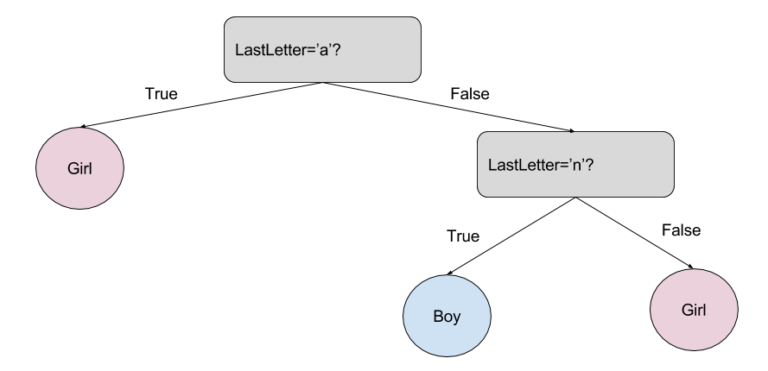

In [15]:
from IPython.display import Image
Image("https://nlpforhackers.io/wp-content/uploads/2017/01/dt-768x371.png")

In [16]:
# To make the predictions:
print(clf.predict(vectorizer.transform(features(["Alex", "Emma"]))))

['M' 'F']


Let's measure the accuracy of the model:

In [17]:
# Accuracy on training set
print(clf.score(vectorizer.transform(X_train), y_train))

0.9878189950013154


In [18]:
# Accuracy on test set
print(clf.score(vectorizer.transform(X_test), y_test))

0.8699289660615628


And here is how the actual model looks like:
![classifier](https://nlpforhackers.io/wp-content/uploads/2017/01/Screen-Shot-2017-01-11-at-20.04.07-1024x406.png)

The root of the tree discriminates on whether feature 4470 is <= 0.5 (meaning if it's false).
To find out what feature 4470 is:

In [19]:
print(vectorizer.feature_names_[4470])

first3-letters=zyr
